In [848]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim



pd.set_option('display.max_columns', 100)

In [849]:
#loading dataframes
df1=pd.read_excel("Telco_customer_churn.xlsx")
df2=pd.read_excel("Telco_customer_churn_services.xlsx")
df3=pd.read_excel("Telco_customer_churn_services.xlsx")
df4=pd.read_excel("Telco_customer_churn_demographics.xlsx")

In [850]:
#Mergin dataframes into one
df1_2=pd.merge(df1, df2, left_on='CustomerID', right_on='Customer ID', how='left').drop('Customer ID', axis=1)
df3_4=pd.merge(df3, df4, left_on='Customer ID', right_on='Customer ID', how='left')
customer_df=pd.merge(df1_2, df3_4, left_on='CustomerID', right_on='Customer ID', how='left').drop('Customer ID', axis=1)

In [851]:
#Cleaning up duplicates 
customer_df=customer_df.T.drop_duplicates().T
customer_df.columns=[column.lower().strip("_x").strip("_y").replace(" ","_")for column in customer_df.columns]  
customer_df["internet_services"]=customer_df["internet_service"].iloc[:,1:2]
customer_df["online_security"]=customer_df["online_securit"].iloc[:,1:2]
customer_df["online_backup_srvc"]=customer_df["online_backup"].iloc[:,1:2]
customer_df["multiple_line"]=customer_df["multiple_lines"].iloc[:,1:2]
customer_df["streaming_tv_srvc"]=customer_df["streaming_tv"].iloc[:,1:2]
customer_df["payment_methods"]=customer_df["payment_method"].iloc[:,:1]
customer_df["total_charge"]=customer_df["total_charges"].iloc[:,:1]
customer_df["contracts"]=customer_df["contract"].iloc[:,1:2]
customer_df["streaming_movies_srvc"]=customer_df["streaming_movies"].iloc[:,1:2]

In [852]:
#Cleaning missing values from "total_charge" column
hold=[]
for x in customer_df.index:
    if type(customer_df.total_charge[x])== str:
        hold.append(0)
    else:
        hold.append(customer_df.total_charge[x])
customer_df.total_charge=hold

In [853]:
#Binning age 
customer_df.age=pd.cut(x=customer_df['age'], bins=[10,20,30,40, 50,60,70,80], labels=["10","20","30","40", "50","60","70"])

In [854]:
#Filling NA values for churn reason
customer_df.churn_reason=customer_df.churn_reason.fillna("No reason given")

In [855]:
#Dropping Redundant columns
customer_df.drop(["total_charges","lat_long","customerid","payment_method","contract","churn_label","count","countr","state","quarter","internet_service","online_securit","online_backup","multiple_lines","streaming_tv","streaming_movies"],axis=1,inplace=True)

In [856]:
hold_df=customer_df.copy()

Text(0.5, 0, 'Churnned')

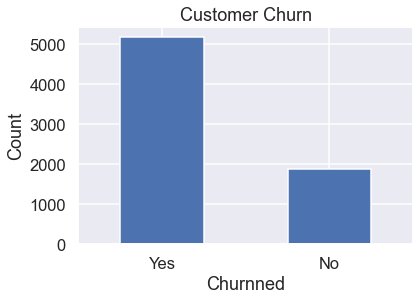

In [857]:
#Plotting target variables
sns.set('talk')
ax=customer_df["churn_value"].value_counts().plot(kind="bar")
ax.set_xticklabels(["Yes","No"],rotation=0)
ax.set_title("Customer Churn")
ax.set_ylabel("Count")
ax.set_xlabel("Churnned")


In [858]:
 def to_binary(column):
    """
    Takes in a column and turns its value from a Yes or No to a binary. 
    """
    conditions=[
        (customer_df[column].str.lower()=='yes'),            
        (customer_df[column].str.lower()=='no'),
    ]
    choises=[
        1,
        0,

    ]
    customer_df[column]=np.select(conditions,choises,default=0)

In [859]:
#converting columns into binary
col_to_bin=["senior_citizen","device_protection_plan","partner","dependents","phone_service","paperless_billing","referred_a_friend","premium_tech_support","streaming_music","unlimited_data","under_30","online_security","multiple_line","online_backup_srvc","streaming_tv_srvc","streaming_movies_srvc","internet_services","tech_support","device_protection"]
for x in col_to_bin:
    to_binary(x)

In [860]:
customer_df

,cit,zip_code,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,device_protection,tech_support,paperless_billing,monthly_charges,churn_value,churn_score,cltv,churn_reason,referred_a_friend,number_of_referrals,tenure_in_months,offer,avg_monthly_long_distance_charges,internet_type,avg_monthly_gb_download,device_protection_plan,premium_tech_support,streaming_music,unlimited_data,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,number_of_dependents,internet_services,online_security,online_backup_srvc,multiple_line,streaming_tv_srvc,payment_methods,total_charge,contracts,streaming_movies_srvc
0,Los Angeles,90003,33.9641,-118.273,Male,0,0,0,2,1,0,0,1,53.85,1,86,3239,Competitor made better offer,0,0,2,None,10.47,DSL,21,0,0,0,1,0,0,20.94,129.09,30,0,0,1,1,1,0,0,Mailed check,108.15,Month-to-Month,0
1,Los Angeles,90005,34.0593,-118.307,Female,0,0,1,2,1,0,0,1,70.7,1,67,2701,Moved,0,0,2,None,9.12,Fiber Optic,51,0,0,0,1,0,0,18.24,169.89,10,1,2,1,0,0,0,0,Electronic check,151.65,Month-to-Month,0
2,Los Angeles,90006,34.048,-118.294,Female,0,0,1,8,1,1,0,1,99.65,1,86,5372,Moved,0,0,8,None,12.15,Cable,26,1,0,1,1,0,0,97.2,917.7,30,0,2,1,0,0,1,1,Electronic check,820.50,Month-to-Month,1
3,Los Angeles,90010,34.0621,-118.316,Female,0,1,1,28,1,1,1,1,104.8,1,84,5003,Moved,0,0,28,Offer C,4.89,Fiber Optic,47,1,1,1,1,0,0,136.92,3182.97,20,1,3,1,0,0,1,1,Electronic check,3046.05,Month-to-Month,1
4,Los Angeles,90015,34.0392,-118.266,Male,0,0,1,49,1,1,0,1,103.7,1,89,5340,Competitor had better devices,0,0,49,None,44.33,Fiber Optic,11,1,0,1,1,0,0,2172.17,7208.47,30,0,1,1,0,1,1,1,Bank transfer (automatic),5036.30,Month-to-Month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.3417,-116.539,Female,0,0,0,72,1,0,0,1,21.15,0,45,5306,No reason given,0,0,72,None,22.77,None,0,0,0,0,0,19.31,0,1639.44,3039.53,20,0,0,0,0,0,0,0,Bank transfer (automatic),1419.40,Two Year,0
7039,Adelanto,92301,34.6678,-117.536,Male,0,1,1,24,1,1,1,1,84.8,0,59,2140,No reason given,1,1,24,Offer C,36.05,Cable,24,1,1,1,1,48.23,0,865.2,2807.47,30,0,2,1,1,0,1,1,Mailed check,1990.50,One Year,1
7040,Amboy,92304,34.5599,-115.637,Female,0,1,1,72,1,1,0,1,103.2,0,71,5560,No reason given,1,4,72,None,29.66,Fiber Optic,59,1,0,1,1,45.38,0,2135.52,9453.04,20,0,2,1,0,1,1,1,Credit card (automatic),7362.90,One Year,1
7041,Angelus Oaks,92305,34.1678,-116.864,Female,0,1,1,11,0,0,0,1,29.6,0,59,2793,No reason given,1,1,11,None,0,DSL,17,0,0,0,1,27.24,0,0,319.21,30,0,2,1,1,0,0,0,Electronic check,346.45,Month-to-Month,0


In [861]:
customer_df.to_csv("customer_df.csv")

In [862]:
#creating dataframe to plot the biggest zipcodes that have churned
zipcode_churn=pd.melt(customer_df[customer_df["churn_value"]==1][["zip_code","cit"]].groupby(["zip_code"]).count().T)

In [885]:
coor=[]
missing_coor={
    370:list((35.923703,-115.870235)),
    535:list((34.832020,-120.540292)),
    550:list((35.380902,-118.427534)),
    562:list((36.312549,-117.865729)),
    577:list((37.179629,-119.288743)),
    578:list((36.799606,-120.019539)),
    579:list((36.528589,-120.322923)),
    598:list((36.618300,-119.521296)),
    606:list((36.957132,-120.650573)),
    627:list((36.594686,-121.414896)),
    631:list((35.986180,-121.221272)),
    771:list((38.037273,-122.702092)),
    774:list((38.042137,-122.773596)),
    930:list((39.065564,-122.787559)),
    951:list((40.786087,-123.414854)),
    954:list((40.729148,-124.216676)),
    957:list((40.310759,-124.091007)),
    959:list((40.550563,-124.086217)),
    963:list((40.217632,-123.865505)),
    968:list((40.830617,-123.588459)),
    973:list((39.916534,-123.708228)),
    996:list((38.918432,-120.903777)),
    997:list((38.667086,-120.504190)),
    998:list((38.846267,-122.201505)),
    1001:list((38.164247,-121.597474)),
    1031:list((38.398772,-121.254699)),
    1072:list((39.411976,-121.372915)),
    1074:list((39.423716,-121.282776)),
    1075:list((39.460376,-121.936819)),
    1076:list((39.481260,-120.948656)),
    1081:list((39.566646,-121.146228)),
    1087:list((39.531550,-122.631569)),
    1092:list((39.050953,-121.894136)),
    1102:list((39.430514,-121.553992)),
    1105:list((39.225852,-121.150217)),
    1106:list((39.696707,-121.016623)),
    1108:list((40.045084,-120.740954)),
    1109:list((40.031208,-121.118713)),
    1118:list((41.041524,-121.111168)),
    1133:list((39.893376,-122.511870)),
    1145:list((41.091140,-121.083458)),
    1146:list((40.341215,-121.461881)),
    1148:list((41.758880,-122.323822)),
    1157:list((40.923122,-122.025144)),
    1159:list((40.611449,-122.499661)),
    1167:list((41.738338,-120.761508)),
    1189:list((39.333969,-120.194170)),  
}

In [887]:
#Creating coordiantes for each zipcode
for i in zipcode_churn.index:
    print("\r"+ str(i+1)+ " of "+ str(len(zipcode_churn)), end="", flush=True )
    if i not in range(len(coor)):
        if i in missing_coor.keys():
            coor.append(missing_coor[i])
        else:
            location = geolocator.geocode(zipcode_churn.zip_code[i],country_codes="USA")
            coor.append(list((location.latitude, location.longitude)))

1190 of 1190

In [888]:
#appending coordinates and scaling values for plotting
zipcode_churn["coor"]=coor
zipcode_churn.value=zipcode_churn.value.map(lambda x : x*2.0)

In [889]:
zipcode_churn.to_csv("zipcode_churn.csv")

In [890]:
#plotting coordinates on map
import folium
california_map = folium.Map(location=[34.052235, -118.243683], zoom_start=5)
marker = folium.CircleMarker(location = [34.052235, -118.243683], radius=10)
marker.add_to(california_map)
for i in zipcode_churn.index:
    marker = folium.CircleMarker(location = zipcode_churn["coor"][i], radius=zipcode_churn.value[i],color='salmon')
    marker.add_to(california_map)


In [891]:
california_map

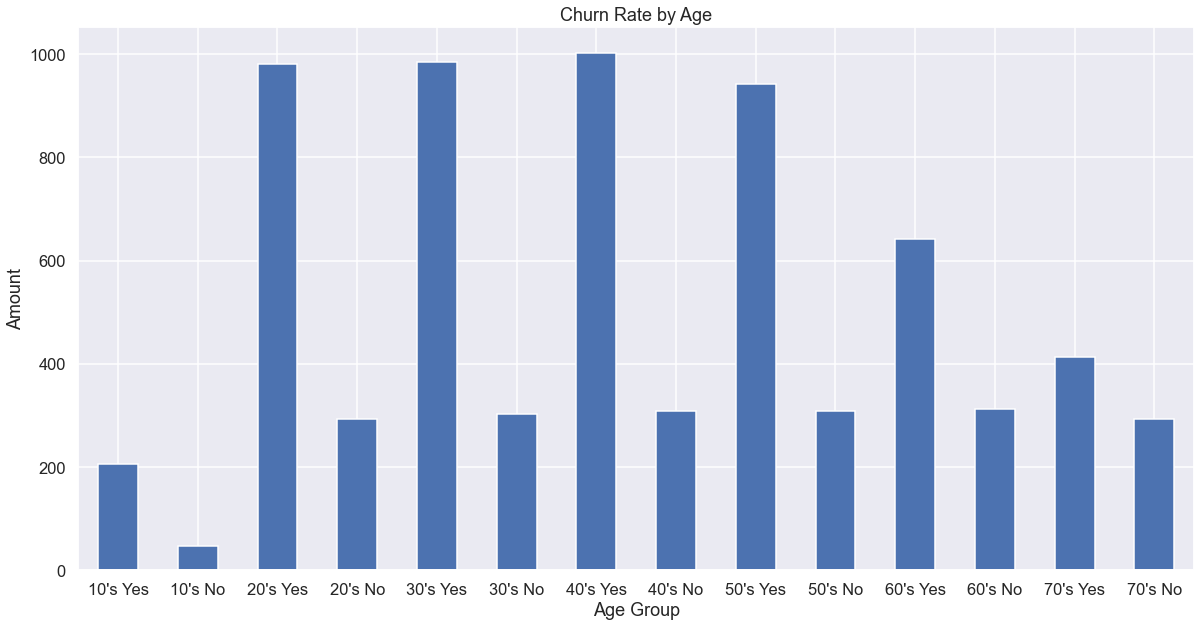

In [869]:
ax=customer_df[["churn_value","age","churn_reason"]].groupby(["age","churn_value"]).count().plot(kind="bar",figsize=(20,10), legend=None)
ax.set_xticklabels(["10's Yes","10's No","20's Yes","20's No","30's Yes","30's No","40's Yes","40's No","50's Yes","50's No","60's Yes","60's No","70's Yes","70's No"],rotation=0)
ax.set_xlabel("Age Group")
ax.set_ylabel("Amount")
ax.set_title("Churn Rate by Age")
plt.show()

In [870]:
customer_df=pd.get_dummies(customer_df,columns=["cit","age","zip_code","gender","churn_reason","offer","internet_type","contracts","payment_methods","internet_type"],drop_first=True)


In [877]:
customer_df=customer_df.astype("float")

In [892]:
customer_df.to_csv("customer_df.csv")

In [878]:
y=customer_df["churn_value"]
X=customer_df[customer_df.columns[customer_df.columns!="churn_value"]]

In [879]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2020, test_size=0.2)

In [880]:
# Fitting our model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [881]:
y_pred_lr = lr.predict(X_test)

In [883]:
from sklearn import metrics
print('Logistic Regression Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred_lr)))
print('Logistic Regression F1: {}'.format(metrics.f1_score(y_test,y_pred_lr)))

Logistic Regression Accuracy: 0.886444286728176
Logistic Regression F1: 0.80440097799511
